# Práctica: Introducción a SEM

> Requiere cargar el archivo ["domes.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/SEM/domes.sav) en el repositorio local. 

Eres parte de un equipo de investigación de psicología forense enfocado en temas de violencia doméstica. Actualmente tu grupo está validando el modelo teórico de una escala sobre estrategias de defensa frente a la corte en casos de mujeres que han asesinado a sus esposos abusivos.

El modelo considera los siguientes constructos e indicadores:

**Provocation**
- Provo: Refleja descontrol ante conducta provocadora del esposo.
- Caused: La provocación fue tal que podría haber descontrolado a cualquiera.
- Passion: Actúo en el calor de la pasión ante la provocación.

**Self defense**
- Protect: Actuó en defensa propia.
- Save: Con su ataque evitó daños corporales de relevancia.
- Defend: Hizo un uso de la fuerza necesario para protegerse.

**Insanity**
- Mental: Refleja un grado de incapacidad mental.
- Insane: Refleja irracionalidad e insanía.
- Stable: Refleja inestabilidad.

Y cuentas con los siguientes datos:

In [1]:
!pip install semopy

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/SEM/export.csv')
df

,sex,age,educ,income,provo,protect,mental,caused,save,insane,passion,defend,stable
0,male,19.0,6.0,1.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0
1,female,21.0,6.0,1.0,4.0,3.0,2.0,6.0,1.0,1.0,3.0,1.0,4.0
2,female,36.0,6.0,2.0,7.0,5.0,2.0,5.0,6.0,2.0,3.0,3.0,5.0
3,female,21.0,6.0,1.0,5.0,4.0,3.0,3.0,3.0,3.0,5.0,4.0,3.0
4,female,19.0,6.0,1.0,8.0,5.0,2.0,6.0,5.0,3.0,6.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,female,18.0,4.0,1.0,7.0,7.0,2.0,7.0,7.0,2.0,6.0,6.0,3.0
393,male,21.0,6.0,1.0,5.0,5.0,5.0,1.0,1.0,7.0,5.0,2.0,7.0
394,female,18.0,6.0,1.0,6.0,6.0,3.0,7.0,7.0,4.0,2.0,4.0,3.0
395,male,20.0,6.0,1.0,8.0,6.0,3.0,6.0,8.0,4.0,8.0,4.0,7.0


1. Define el modelo de acuerdo a la descripción brindada. Genera un gráfico para mostrar los items y constructos definidos.
> Sugerencia: Utiliza el método `semplot` disponible en el paquete `semopy`.

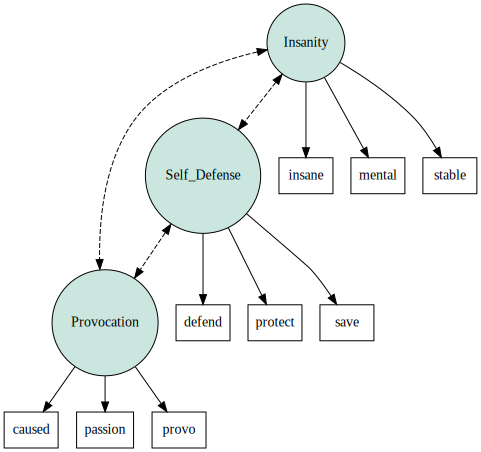

In [3]:
import semopy

measure_desc = '''
# Measurement
Provocation =~ provo + caused + passion
Self_Defense =~ protect + save + defend
Insanity =~ mental + insane + stable

'''

g = semopy.semplot(measure_desc, "out.png", plot_covs=True)
g

2. Ajusta el modelo a tus datos y verifica las métricas de bondad de ajuste. ¿Qué puedes concluir en relación al ajuste general del modelo? ¿Notas algún problema de estimación o identificación?

In [4]:
measure_model = semopy.Model(measure_desc)
res = measure_model.fit(df)
stats = semopy.calc_stats(measure_model)
print(stats.T)

                    Value
DoF             24.000000
DoF Baseline    36.000000
chi2           133.115014
chi2 p-value     0.000000
chi2 Baseline  941.110709
CFI              0.879446
GFI              0.858555
AGFI             0.787833
NFI              0.858555
TLI              0.819169
RMSEA            0.107149
AIC             41.329395
BIC            124.992057
LogLik           0.335302


In [5]:
estimates = measure_model.inspect(std_est=True)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,provo,~,Provocation,1.000000,0.341261,-,-,-
1,caused,~,Provocation,1.801151,0.789753,0.444754,4.049769,0.000051
2,passion,~,Provocation,0.540847,0.178061,0.20319,2.661782,0.007773
3,protect,~,Self_Defense,1.000000,0.731005,-,-,-
4,save,~,Self_Defense,1.211212,0.919118,0.081514,14.859008,0.0
5,defend,~,Self_Defense,0.996392,0.712008,0.073593,13.539251,0.0
6,mental,~,Insanity,1.000000,0.705073,-,-,-
7,insane,~,Insanity,0.901282,0.657931,0.108452,8.310394,0.0
8,stable,~,Insanity,0.874473,0.628483,0.1054,8.296677,0.0
9,Provocation,~~,Provocation,0.481584,1.000000,0.177691,2.710233,0.006724


3. Evalúa la validez del modelo de medición específicado. ¿Qué puedes comentar en relación a las cargas factoriales? ¿Y en relación a los residuos?

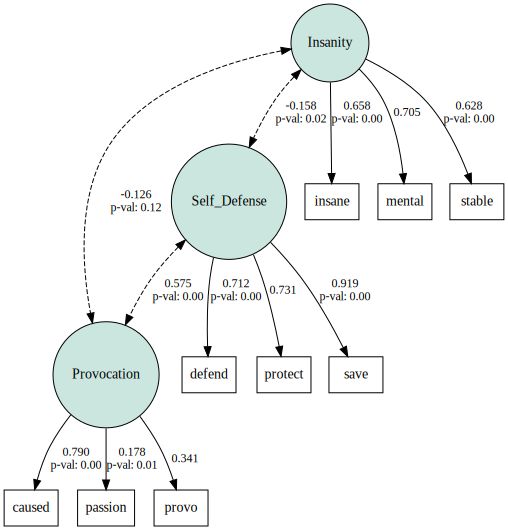

In [6]:
g = semopy.semplot(measure_model, "out.png", std_ests=True, plot_covs=True)
g

In [7]:
import numpy as np

cov_estimate , _ = measure_model.calc_sigma()
cov = measure_model.mx_cov 
residual = cov- cov_estimate
std_residual = residual / np.std(residual)

std_res = pd.DataFrame(std_residual, columns=measure_model.names_lambda[0], index=measure_model.names_lambda[0])
std_res

,caused,defend,insane,mental,passion,protect,provo,save,stable
caused,-0.000242,-0.954829,0.136847,-0.347276,-0.458778,0.176962,0.016409,0.249062,-1.095681
defend,-0.954829,0.000608,-0.523497,0.928848,0.755063,0.424149,-0.707864,0.009202,0.139927
insane,0.136847,-0.523497,0.000200,0.040206,1.391351,-1.190971,3.095657,-1.386947,-0.179399
mental,-0.347276,0.928848,0.040206,0.009859,0.631669,1.878869,2.333247,0.895259,0.125900
passion,-0.458778,0.755063,1.391351,0.631669,0.001530,-0.727680,2.886819,0.313214,0.899447
protect,0.176962,0.424149,-1.190971,1.878869,-0.727680,0.002091,0.505366,-0.103964,0.767191
provo,0.016409,-0.707864,3.095657,2.333247,2.886819,0.505366,-0.002585,-0.629990,1.649589
save,0.249062,0.009202,-1.386947,0.895259,0.313214,-0.103964,-0.629990,0.001550,-0.273484
stable,-1.095681,0.139927,-0.179399,0.125900,0.899447,0.767191,1.649589,-0.273484,0.000552


4. Evalúa la validez de constructo del modelo propuesto. ¿Qué puedes concluir?
> Sugerencia: Considera las medidas AVE y CR.

In [8]:
# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates['op'] == '~']
constructs = loadings['rval'].unique().tolist()

# AVE computation
print("AVE")
for cons in constructs:
    squared_loadings = loadings[loadings['rval'] == cons]['Est. Std']**2
    ave = squared_loadings.sum()/squared_loadings.size
    print(cons,":",ave)

AVE
Provocation : 0.2572914455733792
Self_Defense : 0.6287005682116595
Insanity : 0.44166383776733603


In [9]:
cors = estimates.query(f'op == "~~" & rval == {constructs} & rval != lval')
cors.insert(5,'r^2', cors['Est. Std']**2)
cors

,lval,op,rval,Estimate,Est. Std,r^2,Std. Err,z-value,p-value
10,Provocation,~~,Self_Defense,0.589169,0.575373,0.331054,0.156149,3.773121,0.000161
11,Provocation,~~,Insanity,-0.124957,-0.126226,0.015933,0.079472,-1.572352,0.115869
14,Self_Defense,~~,Insanity,-0.331861,-0.157661,0.024857,0.13745,-2.414407,0.015761


In [10]:
# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates['op'] == '~']
lambdas = pd.DataFrame(measure_model.mx_lambda,columns=measure_model.names_lambda[1], index = measure_model.names_lambda[0])
constructs = loadings['rval'].unique().tolist()

# CR computation
print("CR")
for cons in constructs:
    loads = loadings[loadings['rval'] == cons]['Est. Std']
    idx = np.array(lambdas[cons].to_numpy().nonzero()[0])
    vars = np.array(measure_model.names_lambda[0])[idx].tolist()
    errors = estimates.query(f' op == "~~" & lval == rval & rval == {vars} ')['Est. Std']
    cr = loads.sum()**2 / ( loads.sum()**2 + errors.sum()**2 )  
    print(cons, ":", cr)

CR
Provocation : 0.25660669844396594
Self_Defense : 0.8180805554782399
Insanity : 0.585677918311247
